## Sampling Distributions Introduction

In order to gain a bit more comfort with this idea of sampling distributions, let's do some practice in python.

Below is an array that represents the students we saw in the previous videos, where 1 represents the students that drink coffee, and 0 represents the students that do not drink coffee.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)
students = np.array([1,0,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0])

[random.seed()](https://www.geeksforgeeks.org/random-seed-in-python/) in Python

`1.` Find the proportion of students who drink coffee in the above array. Store this value in a variable **p**.

In [2]:
p = students.mean()
p

0.7142857142857143

In [3]:
coffee = students.sum()
coffee

15

In [4]:
students.size

21

`2.` Use numpy's **random.choice** to simulate 5 draws from the `students` array.  What is proportion of your sample drink coffee?

In [5]:
sample1= np.random.choice(students, 5)
sample1

array([0, 1, 1, 1, 0])

In [6]:
sample1.mean()

0.6

`3.` Repeat the above to obtain 10,000 additional proportions, where each sample was of size 5.  Store these in a variable called `sample_props`.

In [7]:
sample_props = []

for _ in range(int(1e4)):
    mean = np.random.choice(students, 5).mean()
    sample_props.append(mean)

sample_props = np.array(sample_props)
sample_props

array([0.6, 0.4, 0.4, ..., 0.6, 0.6, 1. ])

Had help from this [Medium post](https://medium.com/@dhruvb30/practical-statistics-with-python-1-distributions-theorem-and-confidence-intervals-e0d75661d279)

`4.` What is the mean proportion of all 10,000 of these proportions?  This is often called **the mean of the sampling distribution**.

In [8]:
sample_props.mean()

0.714

`5.` What are the variance and standard deviation for the original 21 data values?

In [9]:
# variance, std
students.var(), students.std()

(0.20408163265306126, 0.45175395145262565)

`6.` What are the variance and standard deviation for the 10,000 proportions you created?

In [10]:
sample_props.var(), sample_props.std()

(0.041763999999999996, 0.2043624231604235)

`7.` Compute p(1-p), which of your answers does this most closely match?

In [11]:
p*(1-p) # it matches the variance of the original data

0.20408163265306123

`8.` Compute p(1-p)/n, which of your answers does this most closely match?

In [12]:
p*(1-p)/5 # the variance of the sample mean of size 5

0.04081632653061225

`9.` Notice that your answer to `8.` is commonly called the **variance of the sampling distribution**.  If you were to change your first sample to be 20, what would this do for the variance of the sampling distribution?  Simulate and calculate the new answers in `6.` and `8.` to check that the consistency you found before still holds.

In [13]:
##Simulate your 20 draws

sample_20 = []

for _ in range(int(1e4)):
    mean = np.random.choice(students, 20).mean()
    sample_20.append(mean)

sample_20 = np.array(sample_20)
sample_20.var(), sample_20.std(), sample_20.mean()

(0.010300994374999999, 0.10149381446669545, 0.714925)

In [14]:
##Compare your variance values as computed in 6 and 8, 
##but with your sample of 20 values
print(p*(1-p)/20) # The theoretical variance
print(np.array(sample_20).var()) # The simulated variance

0.010204081632653062
0.010300994374999999


`10.` Finally, plot a histogram of the 10,000 draws from both the proportions with a sample size of 5 and the proportions with a sample size of 20.  Each of these distributions is a sampling distribution.  One is for the proportions of sample size 5 and the other a sampling distribution for proportions with sample size 20.

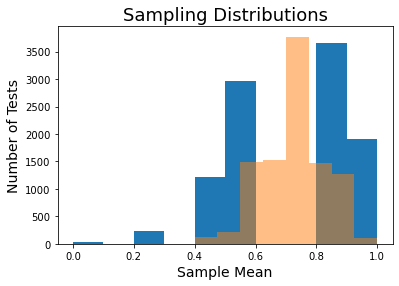

In [15]:
plt.hist(sample_props)
plt.hist(sample_20, alpha=0.5); # Notice the 20 is much more normally distributed than the 5
plt.title('Sampling Distributions', size=18)
plt.ylabel('Number of Tests', size=14)
plt.xlabel('Sample Mean', size=14);

## Notation

Use the information in this notebook to assist with answering the following quiz questions below the notebook.  Let's begin by creating a **population dataset** stored in **pop_data** and importing some libraries.

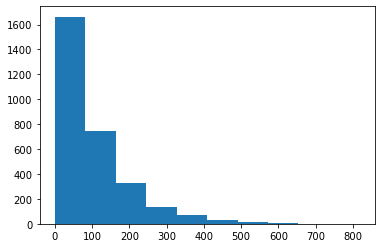

In [16]:
np.random.seed(42)
pop_data = np.random.gamma(1,100, 3000)
plt.hist(pop_data);

`1.` What is the population mean?

In [17]:
pop_data.mean()

100.35978700795846

`2.` Randomly select 10 draws from the population using **numpy's random.choice**.  What is the sample mean for these 10 values?

In [18]:
sample_10 = []

for _ in range(10):
    mean = np.random.choice(pop_data, 1).mean()
    sample_10.append(mean)

sample_10 = np.array(sample_10)
sample_10.mean() # x bar

103.47556549464393

`3.` What is the sample standard deviation of your 10 draws?

In [19]:
sample_10.std() # S

130.00074035573317

`4.` What is the population standard deviation?

In [20]:
pop_data.std() # sigma

99.77860187968906

`5.` What is the population variance?

In [21]:
pop_data.var() # sigma square

9955.76939306549

`6.` What is the sample variance?

In [22]:
sample_10.var() # s square

16900.192493038754

## Law of Large Numbers

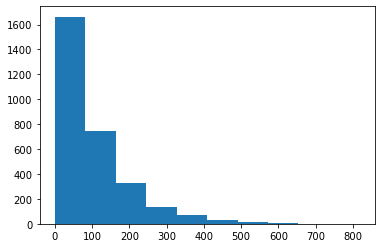

In [23]:
plt.hist(pop_data);

`1.` What is the the number of data values in our population dataset?

In [24]:
pop_data.size

3000

`2.` What is the population mean?

In [25]:
pop_data.mean()

100.35978700795846

`3.` Use numpy's **random.choice** to simulate 5 draws from the `pop_data` array.  What is sample mean?

In [26]:
np.random.choice(pop_data, 5).mean()

191.73223581774064

`4.` Use numpy's **random.choice** to simulate 20 draws from the `pop_data` array.  What is sample mean?

In [27]:
np.random.choice(pop_data, 20).mean()

114.18296633796248

`5.` Use numpy's **random.choice** to simulate 100 draws from the `pop_data` array.  What is sample mean?

In [28]:
np.random.choice(pop_data, 100).mean()

115.97800682446649

## Central Limit Theorem

`1.` In order to create the sampling distribution for the average of 3 draws of this distribution, follow these steps:

`a.` Use numpy's **random.choice** to simulate 3 draws from the `pop_data` array.   <br><br>
`b.` Compute the mean of these 3 draws. <br><br>
`c.` Write a loop to simulate this process 10,000 times, and store each mean into an array called **means_size_3**.<br><br>
`d.` Plot a histogram of your sample means.<br><br>
`e.` Use **means_size_3** and **pop_data** to answer the quiz questions below.

In [29]:
# a
a = np.random.choice(pop_data, 3)
a

array([ 19.16042225, 123.15909951, 147.0364084 ])

In [30]:
# b 
a.mean()

96.4519767206743

In [31]:
# c
means_size_3 = []

for _ in range(int(1e4)):
    mean = np.random.choice(pop_data, 3).mean()
    means_size_3.append(mean)

means_size_3 = np.array(means_size_3) 

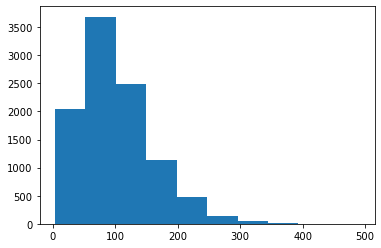

In [32]:
# d 
plt.hist(means_size_3);
#plt.hist(pop_data, alpha=0.5);

this distribution with sample size 3 doesn't look normally distributed... so it's not 'big enough' to illustrate the Central Limit Theorem

In [33]:
# mean of the sampling distribution
means_size_3.mean()

100.79850937310337

In [34]:
# mean of the population
pop_data.mean()

100.35978700795846

In [35]:
# var of the population
pop_data.var()

9955.76939306549

In [36]:
# var of the sampling distribution
means_size_3.var()

3327.594149799386

## Central Limit Theorem - Part II
In the previous concept, you saw that a sample size of 3 wasn't large enough for the Central Limit Theorem to apply. 

`1.` In order to create the sampling distribution for the average of 100 draws of this distribution, follow these steps:

`a.` Use numpy's **random.choice** to simulate 100 draws from the `pop_data` array.   <br><br>
`b.` Compute the mean of these 100 draws. <br><br>
`c.` Write a loop to simulate this process 10,000 times, and store each mean into an array called **means_size_100**.<br><br>
`d.` Plot a histogram of your sample means.<br><br>
`e.` Use **means_size_100** and **pop_data** to answer the quiz questions below.

In [37]:
# a & b
a = np.random.choice(pop_data, 100)
a.mean()

78.07528601835541

In [38]:
# c
means_size_100 = []

for _ in range(int(1e4)):
    sample = np.random.choice(pop_data, 100)
    means_size_100.append(sample.mean())

means_size_100 = np.array(means_size_100)
means_size_100.mean()

100.42916501645087

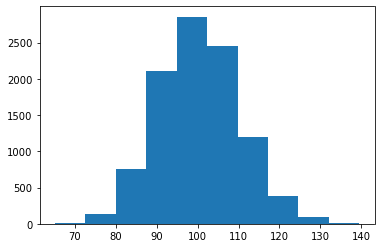

In [39]:
# d
plt.hist(means_size_100);
#plt.hist(pop_data, alpha=.5);

In [40]:
# mean of the sampling distribution
means_size_100.mean()

100.42916501645087

In [41]:
# mean of the population
pop_data.mean()

100.35978700795846

In [42]:
# variance of the population
pop_data.var()

9955.76939306549

In [43]:
# variance of the sampling distribution
means_size_100.var()

97.17688018218709

Notice the shrinking of the variance in the sampling distribution. It is the case, that this is always by a factor of n. That is, the variance of the sampling distribution is the variance of the population divided by the sample size (100) in this case.

## Central Limit Theorem - Part III
You saw how the Central Limit Theorem worked for the sample mean in the earlier concept. The Central Limit Theorem states that with a large enough sample size, the sampling distribution of the mean will be normally distributed.

The Central Limit Theorem actually applies to these well-known statistics:

Sample means
Sample proportions
Difference in sample means
Difference in sample proportions
And it applies to additional statistics, but it doesn't apply to all statistics! Here, you will simulate the sampling distribution for the sample variance

`1.` In order to create the sampling distribution for the variance of 100 draws of this distribution, follow these steps:

`a.` Use numpy's **random.choice** to simulate 100 draws from the `pop_data` array.   <br><br>
`b.` Compute the variance of these 100 draws. <br><br>
`c.` Write a loop to simulate this process 10,000 times, and store each variance into an array called **var_size_100**.<br><br>
`d.` Plot a histogram of your sample variances.<br><br>
`e.` Use **var_size_100** and **pop_data** to answer the quiz questions below. 

In [44]:
# a 
a = np.random.choice(pop_data, 100)

In [45]:
# b
a.var()

6308.945914777702

In [46]:
# c
var_size_100 = []

for _ in range(int(1e4)):
    sample = np.random.choice(pop_data, 100)
    var_size_100.append(sample.var())

var_size_100 = np.array(var_size_100)

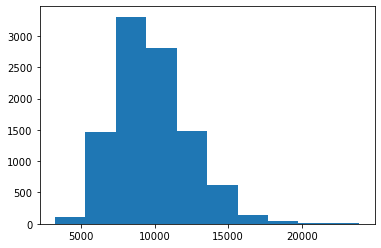

In [47]:
# d
plt.hist(var_size_100);

In [48]:
# variance of the population
pop_data.var()

9955.76939306549

In [49]:
# mean of the sampling distrubition for the sample variance
var_size_100.mean()

9820.027490718352

In [50]:
# variance of the sampling distribution for the sample variance
var_size_100.var()

6392734.757659948

So it looks like the center of our sampling distribution is close to the true variance in the population, but a larger sample size seems necessary for these to be closer to equal.

## Bootstraping
Bootstrapping is sampling with replacement. Using random.choice in Python actually samples in this way. Where the probability of any number in our set stays the same regardless of how many times it has been chosen. Flipping a coin and rolling a die is like bootstrap sampling as well, as rolling a 6 in one scenario doesn't mean that 6 is less likely later.

In [57]:
students

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [58]:
students.mean()

0.7142857142857143

In [62]:
sample = np.random.choice(students, 21)
sample

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1])

Notice the array isn't the same as the students population, because we a sampling with replacement 

In [63]:
sample.mean()

0.8571428571428571

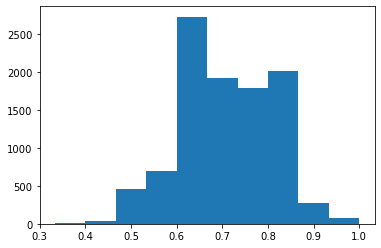

In [67]:
proportions = [np.random.choice(students, 21).mean() for _ in range(int(1e4))]
plt.hist(proportions);

So, you may not have noticed that you have already been performing bootstrap sampling throughout this lesson. As well as in earlier lessons with Binomial events and die rolls. Once you flip heads or roll a 6, you can continue to flip or roll that value again, which means that it is replaced even after being selected.

Below is an array of the possible values you can obtain from a die. Let's consider different methods of sampling from these values.

In [68]:
die_vals = np.array([1,2,3,4,5,6])

1. Take a random sample of 20 values from **die_vals** using the code below, then answer the question in the first quiz below.

In [71]:
np.random.choice(die_vals, size=20)

array([3, 2, 1, 6, 2, 3, 3, 5, 1, 4, 4, 1, 5, 5, 4, 3, 3, 6, 3, 5])

`2.` Use the code below to choose another sample from **die_vals**, then answer the question in the first quiz below.

In [74]:
# np.random.choice(die_vals, replace=False, size=20)
# this piece of code will raise a ValueError:
# ValueError: Cannot take a larger sample than population when 'replace=False'

This technique is credited to Bradley Effron in 1979.

- You can learn more about Bradley Efron [here](https://en.wikipedia.org/wiki/Bradley_Efron).
- Additional notes on why bootstrapping works as a technique for inference can be found [here](https://stats.stackexchange.com/questions/26088/explaining-to-laypeople-why-bootstrapping-works).

Terms recap:
- A numeric summary of a sample: `statistc`
- A numeric summary of a population: `parameter`
- The distribution of a statistic: `sampling distribution`
- Used to notate parameters: `Greek symbols`
- Sampling with replacement: `bootstraping`
- A theorem that states: the larger the sample size, the closer our statistic gets to the parameter: `Law of Large Numbers`
- A theorem that states: if our sample size is large enough, the sample mean will be normally distributed: `The Central Limit Theorem`
- Describing the data we have collected: `Descriptive Statistics`
- Using the data we have collected to draw conclusions about our population of interest: `Inferential Statistics`